In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read dataset files
test_df = pd.read_csv('dataset/test.csv')
train_df = pd.read_csv('dataset/train.csv')

In [3]:
#See what the dataset is like
train_df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [4]:
#Drop columns we don't need
test_df = test_df.drop(['customer_id', 'name', 'no_of_days_employed'], axis=1)
train_df = train_df.drop(['customer_id', 'name', 'no_of_days_employed'], axis=1)

In [5]:
#Drop rows with missing values
test_df = test_df.dropna(how='any')
train_df = train_df.dropna(how='any')

In [6]:
#Drop row with invalid gender
test_df = test_df.loc[test_df["gender"] != 'XNA']
train_df = train_df.loc[train_df["gender"] != 'XNA']

In [7]:
#Convert gender, owns_car, owns_house, occupation_type to binary encoding
test_df = pd.get_dummies(test_df, columns=["gender", "owns_car", "owns_house", "occupation_type"])
train_df = pd.get_dummies(train_df, columns=["gender", "owns_car", "owns_house", "occupation_type"])

In [8]:
train_df.head()

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Going to work with just the train_df dataset since it has over 40,000 entries
X = train_df.drop('credit_card_default', axis=1)
y = train_df['credit_card_default']
target_names = ["no-default", "default"]

print(X.shape, y.shape)

(43952, 36) (43952,)


In [10]:
#Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y

0        1
1        0
2        0
3        0
4        0
        ..
45523    0
45524    0
45525    0
45526    0
45527    0
Name: credit_card_default, Length: 43952, dtype: int64

In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)

# Transform the X_train and X_test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 1.363108  ,  0.80105857, -0.03390054, ..., -0.15090995,
        -0.67942897, -0.06623872],
       [-1.25639527, -0.57849812, -0.15263361, ..., -0.15090995,
        -0.67942897, -0.06623872],
       [-0.73249462,  2.18061526,  1.07163216, ..., -0.15090995,
        -0.67942897, -0.06623872],
       ...,
       [ 1.46788813, -0.57849812, -0.0557289 , ..., -0.15090995,
         1.47182419, -0.06623872],
       [ 1.6774484 ,  0.80105857, -0.17767738, ..., -0.15090995,
        -0.67942897, -0.06623872],
       [-1.3611754 , -0.57849812, -0.03137104, ..., -0.15090995,
        -0.67942897, -0.06623872]])

In [12]:
#SVM Model
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [13]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.980


In [14]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

  no-default       0.98      1.00      0.99     10092
     default       1.00      0.76      0.86       896

    accuracy                           0.98     10988
   macro avg       0.99      0.88      0.93     10988
weighted avg       0.98      0.98      0.98     10988



<AxesSubplot:>

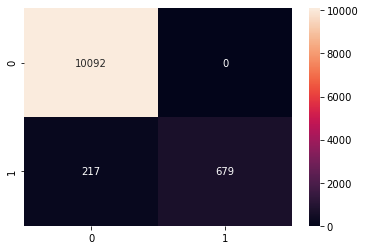

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt="d")

In [16]:
predictions_df = pd.DataFrame({"Prediction": predictions})
actual_df = pd.DataFrame({"Actual": y_test})

In [17]:
predictions_df.value_counts()

Prediction
0             10309
1               679
dtype: int64

In [18]:
actual_df.value_counts()

Actual
0         10092
1           896
dtype: int64

In [20]:
#Save the model
import joblib

filename = 'saved_models/SVM_trained.joblib'
joblib.dump(model, filename)

['saved_models/SVM_trained.joblib']

In [23]:
#Load the model
loaded_model = joblib.load(filename)
print('Test Acc: %.3f' % loaded_model.score(X_test_scaled, y_test))

Test Acc: 0.980
